<a href="https://colab.research.google.com/github/ssinc21/Estudo-curso-Machine-Learning-de-A-Z/blob/main/Analise_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas utilizadas

In [1]:
# Numpy e Pandas para manipulação de dados.
import numpy as np
import pandas as pd

# Sklearn preprocessing para variáveis categpricas.
from sklearn.preprocessing import LabelEncoder

# Gerenciamento do sistema
import os

# Avisos
import warnings
warnings.filterwarnings('ignore')

# matplotlib e seaborn para plotar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Importação dos Dados

### Dados de treino

In [2]:
X_train = pd.read_csv("/content/application_train.csv")

In [3]:
X_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Dados de teste

In [4]:
X_test = pd.read_csv("/content/application_test.csv")

In [5]:
X_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


# Examinar Dados Faltantes

Verificando se o Dataset possue colunas com dados faltantes.

In [6]:
def miss_val_dataframe(df):
        # Total de dados faltantes
        mis_val = df.isnull().sum()

        # Porcentagem de dados faltantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Montar a tabela com os resultados
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Renomear colunas
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valores Faltantes', 1 : '% of Total Valores'})

        # Ordenar tabela
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Valores', ascending=False).round(1)

        # Printar
        print ("Seu dataframe tem: " + str(df.shape[1]) + " colunas.\n"
            "E ele tem " + str(mis_val_table_ren_columns.shape[0]) +
              " colunas com valores faltantes.")

        # Retonar o DataFrame resultante
        return mis_val_table_ren_columns

In [7]:
# Estatistica dos valores faltantes
missing_values = miss_val_dataframe(X_train)
missing_values.head(20)

Seu dataframe tem: 122 colunas.
E ele tem 65 colunas com valores faltantes.


,Valores Faltantes,% of Total Valores
COMMONAREA_MODE,19027,70.0
COMMONAREA_MEDI,19027,70.0
COMMONAREA_AVG,19027,70.0
NONLIVINGAPARTMENTS_AVG,18873,69.5
NONLIVINGAPARTMENTS_MODE,18873,69.5
NONLIVINGAPARTMENTS_MEDI,18873,69.5
LIVINGAPARTMENTS_MODE,18601,68.5
LIVINGAPARTMENTS_MEDI,18601,68.5
LIVINGAPARTMENTS_AVG,18601,68.5
FONDKAPREMONT_MODE,18599,68.5


O dataset possue 122 colunas e dessas 67 estão com dados faltantes.

# Tipos de dados das colunas

In [8]:
# Quantidade de cada tipo de coluna
X_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [9]:
# Quantidade de classes unicas em cada tipo de objeto.
X_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               6
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Label Encoding

In [10]:
# Criar o objeto do Label Encoding
le = LabelEncoder()
le_count = 0

# Aplicar a cada coluna objeto
for col in X_train:
    if X_train[col].dtype == 'object':
        # Aplica somente se os valores unicos for menor que 2.
        if len(list(X_train[col].unique())) <= 2:
            le.fit(X_train[col])
            # Transforme os dados de treinamento e teste
            X_train[col] = le.transform(X_train[col])
            X_test[col] = le.transform(X_test[col])

            # Quantas colunas foram codificadas
            le_count += 1

print('%d colunas foram aplicadas o Label Encoding.' % le_count)

4 colunas foram aplicadas o Label Encoding.


### One-Hot Encoding

In [11]:
# Codificação one-hot de variáveis categóricas
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

print('Formato do dataset de treinamento: ', X_train.shape)
print('Formato do dataset de treinamento: ', X_test.shape)

Formato do dataset de treinamento:  (27166, 238)
Formato do dataset de treinamento:  (26948, 238)


### Alinhando a base de treino com a base de teste

In [12]:
train_labels = X_train['TARGET']

# Alinhe os dados de treinamento e teste, mantenha apenas as colunas presentes em ambos os dataframes
X_train, X_test = X_train.align(X_test, join = 'inner', axis = 1)

# Adicionar o Target no dataset de treino novamente.
X_train['TARGET'] = train_labels

print('Formato do dataset de treinamento: ', X_train.shape)
print('Formato do dataset de treinamento: ', X_test.shape)

Formato do dataset de treinamento:  (27166, 238)
Formato do dataset de treinamento:  (26948, 237)


# Exploração dos Dados

Sempre quando se trata de dados para análise de crédito o atributo idade é um forte indicador na nosssa base. Então por isso ele será utilizado para fazer analise de comportamento dos dados.

In [13]:
X_train['DAYS_BIRTH'].describe()

count    27166.000000
mean    -16033.847456
std       4361.745567
min     -25182.000000
25%     -19674.000000
50%     -15754.000000
75%     -12374.000000
max      -7680.000000
Name: DAYS_BIRTH, dtype: float64

O dado Idade está em dias corridos desde o nascimento da pessoa.

In [14]:
(X_train['DAYS_BIRTH']/-365).describe()

count    27166.000000
mean        43.928349
std         11.949988
min         21.041096
25%         33.901370
50%         43.161644
75%         53.901370
max         68.991781
Name: DAYS_BIRTH, dtype: float64

Outra variável que remete a Data é o quantidade de dias empregado "DAYS_EMPLOYED".

In [15]:
X_train['DAYS_EMPLOYED'].describe()

count     27166.000000
mean      63790.226607
std      141275.465218
min      -16365.000000
25%       -2780.750000
50%       -1226.000000
75%        -288.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

O valor máximo é uma anomalia, o empregado está no emprego há 1000 anos.

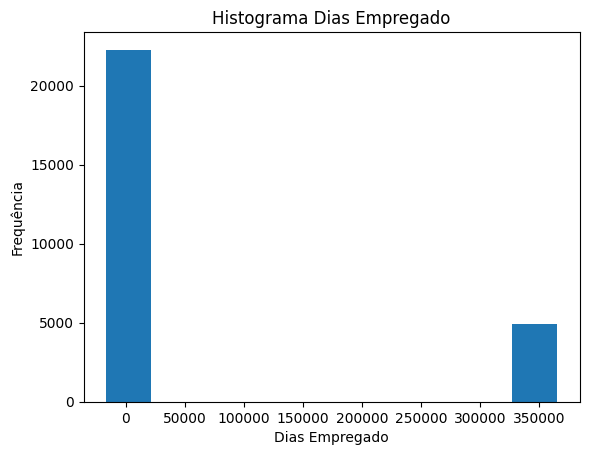

In [16]:
X_train['DAYS_EMPLOYED'].plot.hist(title = 'Histograma Dias Empregado');
plt.ylabel('Frequência');
plt.xlabel('Dias Empregado');

Só por curiosidade, vamos subconjunto dos clientes anômalos e ver se eles tendem a ter taxas de inadimplência maiores ou menores do que os demais clientes.

In [17]:
anom = X_train[X_train['DAYS_EMPLOYED'] == 365243]
non_anom = X_train[X_train['DAYS_EMPLOYED'] != 365243]
print('As não anomalias inadimplem em %0.2f%% dos empréstimos' % (100 * non_anom['TARGET'].mean()))
print('As anomalias não pagam %0.2f%% dos empréstimos' % (100 * anom['TARGET'].mean()))
print('Há %d dias anômalos de trabalho' % len(anom))

As não anomalias inadimplem em 8.51% dos empréstimos
As anomalias não pagam 5.70% dos empréstimos
Há 4891 dias anômalos de trabalho


Bem, isso é extremamente interessante! Acontece que as anomalias têm menor taxa de inadimplência.

O tratamento das anomalias depende da situação exata, sem regras definidas. Uma das abordagens mais seguras é apenas definir as anomalias como um valor ausente e, em seguida, preenchê-las (usando Imputação) antes do aprendizado de máquina. Nesse caso, como todas as anomalias têm exatamente o mesmo valor, queremos preenchê-las com o mesmo valor caso todos esses empréstimos tenham algo em comum. Os valores anômalos parecem ter alguma importância, então queremos dizer ao modelo de aprendizado de máquina se de fato preenchemos esses valores. Como solução, vamos preencher os valores anômalos com não um número (`np.nan`) e então criar uma nova coluna booleana indicando se o valor era ou não anômalo.

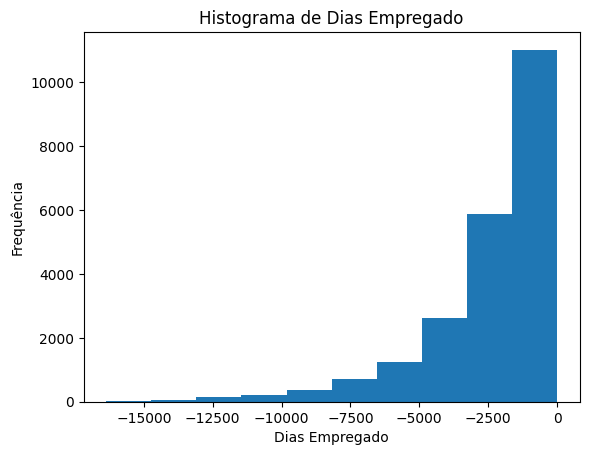

In [18]:
# Criar a classificação de anomalia no Days_Employed_Anom
X_train['DAYS_EMPLOYED_ANOM'] = X_train["DAYS_EMPLOYED"] == 365243

# Alterar o valor anomalo para NaN
X_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

X_train['DAYS_EMPLOYED'].plot.hist(title = 'Histograma de Dias Empregado');
plt.ylabel('Frequência');
plt.xlabel('Dias Empregado');

In [19]:
X_test['DAYS_EMPLOYED_ANOM'] = X_test["DAYS_EMPLOYED"] == 365243
X_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (X_test["DAYS_EMPLOYED_ANOM"].sum(), len(X_test)))

There are 5111 anomalies in the test data out of 26948 entries


A distribuição parece estar muito mais alinhada com o que esperaríamos, e também criamos uma nova coluna para informar ao modelo que esses valores eram originalmente anômalos (porque teremos que preencher os nans com algum valor, provavelmente a mediana da coluna). As outras colunas com `DAYS` no quadro de dados parecem ser o que esperamos, sem outliers óbvios.

Como uma observação extremamente importante, qualquer coisa que fizermos com os dados de treinamento também devemos fazer com os dados de teste. Certifique-se de criar a nova coluna e preencher a coluna existente com `np.nan` nos dados de teste.

# Idade x Pagamento

In [20]:
# Encontre a correlação dos dias positivos desde o nascimento e alvo
X_train['DAYS_BIRTH'] = abs(X_train['DAYS_BIRTH'])
X_train['DAYS_BIRTH'].corr(X_train['TARGET'])

-0.08379124392825052

À medida que o cliente envelhece, há uma relação linear negativa com a meta, o que significa que, à medida que os clientes envelhecem, eles tendem a pagar seus empréstimos no prazo com mais frequência.

Vamos começar a olhar para esta variável. Primeiro, podemos fazer um histograma da idade. Colocaremos o eixo x em anos para tornar o enredo um pouco mais compreensível.

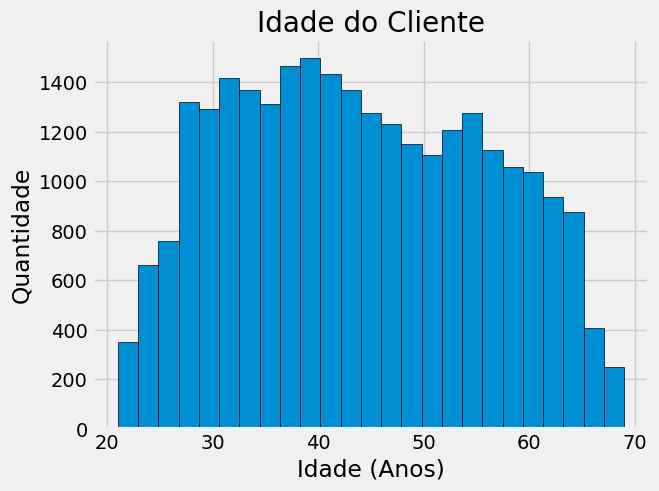

In [21]:

plt.style.use('fivethirtyeight')

plt.hist(X_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Idade do Cliente'); plt.xlabel('Idade (Anos)'); plt.ylabel('Quantidade');

Por si só, a distribuição de idade não nos diz muito além de que não há outliers, pois todas as idades são razoáveis. Para visualizar o efeito da idade no alvo, faremos um [gráfico de estimativa de densidade do kernel](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) colorido pelo valor do alvo. Um [gráfico de estimativa de densidade de kernel mostra a distribuição de uma única variável](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone -pollution-data-in-new-york-and-ozonopolis/) e pode ser pensado como um histograma suavizado (criado pelo cálculo de um kernel, geralmente um gaussiano, em cada ponto de dados e, em seguida, calculando a média de todos os kernels individuais para desenvolver uma única curva suave). Usaremos o `kdeplot` de origem marítima para este gráfico.

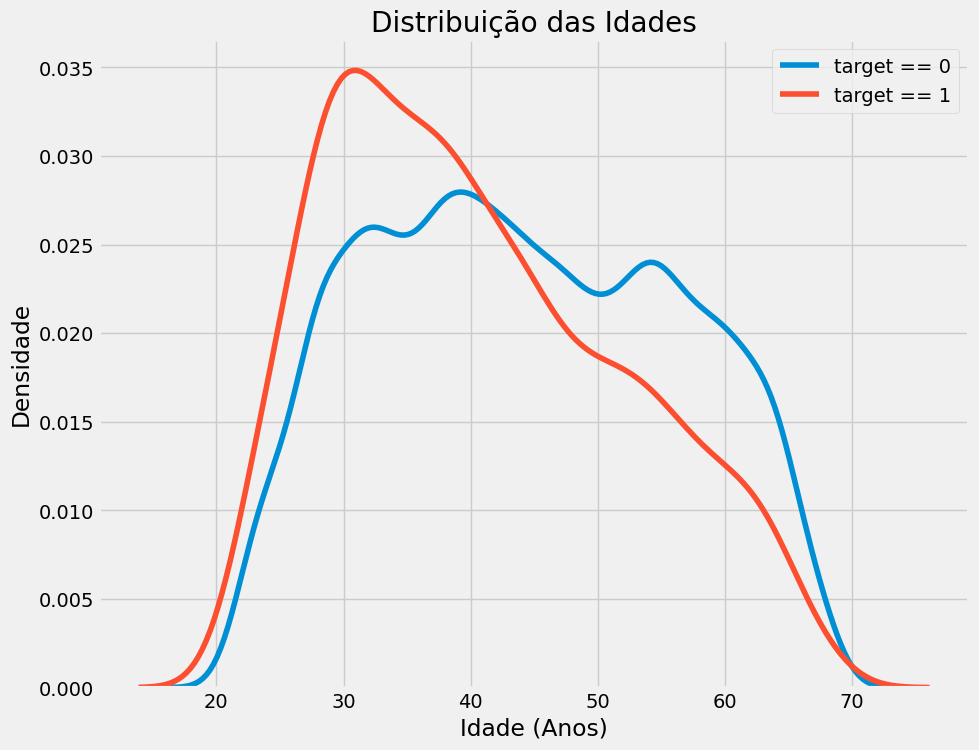

In [22]:
plt.figure(figsize = (10, 8))


sns.kdeplot(X_train.loc[X_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

sns.kdeplot(X_train.loc[X_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Idade (Anos)'); plt.ylabel('Densidade'); plt.title('Distribuição das Idades');
plt.legend()

A curva alvo == 1 se inclina para a extremidade mais jovem do intervalo. Embora essa não seja uma correlação significativa (coeficiente de correlação de -0,07), essa variável provavelmente será útil em um modelo de aprendizado de máquina porque afeta o alvo. Vejamos essa relação de outra forma: média de inadimplência por faixa etária.

Para fazer este gráfico, primeiro 'cortamos' a categoria de idade em intervalos de 5 anos cada. Em seguida, para cada faixa, calculamos o valor médio da meta, que nos informa a proporção de empréstimos não pagos em cada categoria de idade.

In [23]:
# Informações de idade em um dataframe separado
X_train_data = X_train[['TARGET', 'DAYS_BIRTH']]
X_train_data['YEARS_BIRTH'] = X_train_data['DAYS_BIRTH'] / 365

# Bin os dados de idade
X_train_data['YEARS_BINNED'] = pd.cut(X_train_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
X_train_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [24]:
# Agrupando por idade média
age_groups  = X_train_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.118483,8527.145972,23.362044
"(25.0, 30.0]",0.116158,10150.522191,27.809650
"(30.0, 35.0]",0.103113,11860.066982,32.493334
"(35.0, 40.0]",0.092593,13713.052335,37.570006
"(40.0, 45.0]",0.076498,15496.068766,42.454983
"(45.0, 50.0]",0.068800,17321.810560,47.457015
"(50.0, 55.0]",0.063239,19203.503354,52.612338
"(55.0, 60.0]",0.053838,20973.376520,57.461306
"(60.0, 65.0]",0.050596,22786.002468,62.427404


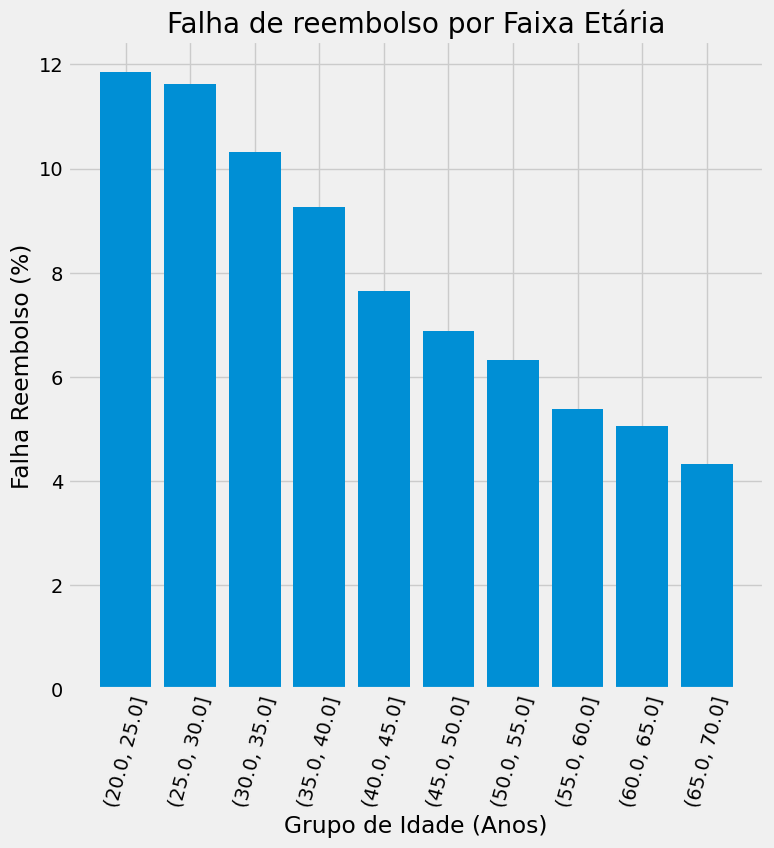

In [25]:
plt.figure(figsize = (8, 8))

# Gráfico das categorias de idade e a média do alvo como um gráfico de barras
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plotar
plt.xticks(rotation = 75); plt.xlabel('Grupo de Idade (Anos)'); plt.ylabel('Falha Reembolso (%)')
plt.title('Falha de reembolso por Faixa Etária');

Há uma tendência clara: os candidatos mais jovens têm maior probabilidade de não pagar o empréstimo! A taxa de incumprimento é superior a 10% para os três escalões etários mais jovens e inferior a 5% para os escalões mais velhos.

Esta é uma informação que pode ser usada diretamente pelo banco: como os clientes mais jovens têm menos probabilidade de pagar o empréstimo, talvez eles devam receber mais orientações ou dicas de planejamento financeiro. Isso não significa que o banco deva discriminar os clientes mais jovens, mas seria inteligente tomar medidas de precaução para ajudar os clientes mais jovens a pagar em dia.

# Correlação

In [26]:
# Encontrando correlação e ordenando valores
correlations = X_train.corr()['TARGET'].sort_values()

# Printando as correlações
print('Correlações positivas (15):\n', correlations.tail(15))
print('\nCorrelações negativos (15):\n', correlations.head(15))

Correlações positivas (15):
 DAYS_ID_PUBLISH                                      0.046044
DEF_30_CNT_SOCIAL_CIRCLE                             0.046217
REG_CITY_NOT_WORK_CITY                               0.046455
DEF_60_CNT_SOCIAL_CIRCLE                             0.047519
FLAG_DOCUMENT_3                                      0.047539
NAME_INCOME_TYPE_Working                             0.051860
NAME_EDUCATION_TYPE_Secondary / secondary special    0.052158
CODE_GENDER                                          0.054113
DAYS_LAST_PHONE_CHANGE                               0.055131
REGION_RATING_CLIENT                                 0.066832
REGION_RATING_CLIENT_W_CITY                          0.067030
DAYS_EMPLOYED                                        0.081480
TARGET                                               1.000000
FLAG_DOCUMENT_10                                          NaN
FLAG_DOCUMENT_12                                          NaN
Name: TARGET, dtype: float64

Correlações

# Regressão Logistica

## Normalização

In [27]:
X_train.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
count,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,2.716600e+04,2.716600e+04,27166.000000,2.714400e+04,...,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000
mean,115824.507730,0.095487,0.341088,0.338695,0.693661,0.417065,1.727825e+05,6.005350e+05,27157.110230,5.398878e+05,...,0.030884,0.006957,0.005779,0.005522,0.215269,0.210410,0.017411,0.520761,0.006847,0.080063
std,9123.754807,0.293892,0.474084,0.473275,0.460981,0.723832,7.157358e+05,4.018832e+05,14653.348609,3.695203e+05,...,0.173007,0.083121,0.075803,0.074103,0.411016,0.407607,0.130801,0.499578,0.082463,0.271396
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107921.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,115828.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.449000e+05,5.185620e+05,24997.500000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,123769.750000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34678.125000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,131575.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
X_test.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,26948.000000,26948.000000,26948.000000,26948.000000,26948.000000,26948.000000,2.694800e+04,2.694800e+04,26927.000000,2.694800e+04,...,26948.000000,26948.000000,26948.000000,26948.000000,26948.000000,26948.000000,26948.000000,26948.000000,26948.000000,26948.000000
mean,197806.749221,0.008832,0.328893,0.336537,0.693966,0.398286,1.786534e+05,5.158340e+05,29365.347198,4.618987e+05,...,0.003822,0.030689,0.007533,0.005678,0.005900,0.230407,0.211890,0.016773,0.535105,0.007681
std,56628.177360,0.093564,0.469820,0.472534,0.460852,0.714798,1.041331e+05,3.645709e+05,15992.785493,3.364728e+05,...,0.061707,0.172476,0.086467,0.075137,0.076588,0.421101,0.408655,0.128422,0.498775,0.087308
min,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,149477.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.606400e+05,17905.500000,2.250000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,197653.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.500000e+05,26113.500000,3.960000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,246745.250000,0.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,6.750000e+05,37309.500000,6.300000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,296428.000000,1.000000,1.000000,1.000000,1.000000,20.000000,4.410000e+06,2.160000e+06,180576.000000,2.160000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Retirar a coluna Target do dataset de treino.
if 'TARGET' in X_train:
    train = X_train.drop(columns = ['TARGET'])
else:
    train = X_train.copy()

# Feature names
features = list(train.columns)

# Copia do dataset de teste
test = X_test.copy()

# Imputando valores medianos aos dados faltantes.
imputer = SimpleImputer(strategy = 'median')

# Alterando a escala dos dados de 0 a 1.
scaler = MinMaxScaler(feature_range = (0,1))

# Ajuste nos dados de treino
imputer.fit(train)

# Transformando os dados de treino e teste
train = imputer.transform(train)
test = imputer.transform(test)

# Repetir com as escalas
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)


print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)


Training data shape:  (27166, 238)
Testing data shape:  (26948, 238)


Aplicação da Regressão Logistica

In [30]:
from sklearn.linear_model import LogisticRegression

# Modelo com o parâmetro de regularização especificado em C = 0.0001
log_reg = LogisticRegression(C = 0.0001)

# Treinando do dataset de treino
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [31]:
log_reg.score(train, train_labels)

0.9199366855628359

In [32]:
# Fazendo predições
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [33]:
from sklearn.metrics import roc_auc_score
log_reg_pred_train = log_reg.predict_proba(train)[:, 1]
roc_auc_score(train_labels, log_reg_pred_train)

0.6637953801299503

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, log_reg_pred_train)

0.09118917915832439


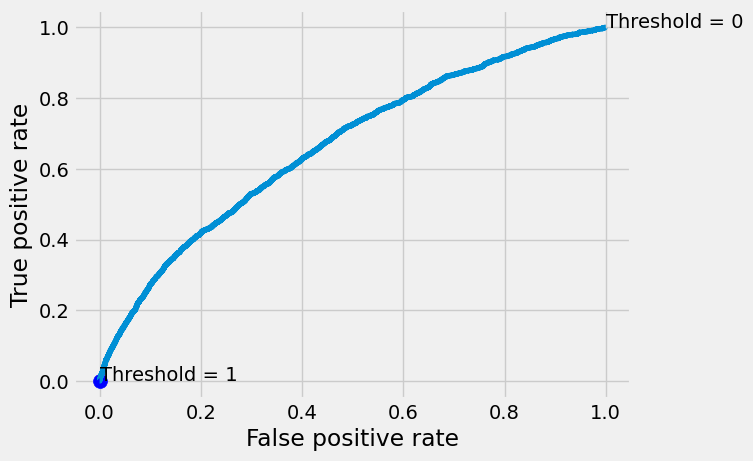

In [35]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
index = int(0.001*len(thresholds))
plt.scatter(fpr[index], tpr[index], c='b', s=100)

plt.text(1, 1, 'Threshold = 0')
plt.text(0, 0, 'Threshold = 1')
print(thresholds[index])

In [36]:
# Dataset Resultado
submit = X_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.079407
1,100005,0.087065
2,100013,0.081240
3,100028,0.080417
4,100038,0.087978
